In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/SMART-CITIES/

Mounted at /gdrive
/gdrive/My Drive/SMART-CITIES


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import folium
import branca.colormap as cm
from folium.plugins import AntPath

In [ ]:
# File path
file3 = './../raw/DB3.csv'

# Read the CSV files into DataFrames
df3 = pd.read_csv(file3)

# Define the new header
new_header = ['Timestamp', 'Temperature', 'Humidity', 'Air Quality', 'Latitude', 'Longitude']

# Set the header
df3.columns = new_header

# Adjust timestamp type
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'], format='%d/%m/%Y %H:%M:%S')

# Define the cutoff timestamp
begin_timestamp = pd.Timestamp('2024-06-20 15:24:00')
end_timestamp = pd.Timestamp('2024-06-20 15:55:00')

# Filter the DataFrame

filtered_df3 = df3[df3['Timestamp'] >= begin_timestamp]

filtered_df3 = filtered_df3[filtered_df3['Timestamp'] <= end_timestamp]

# Save the concatenated dataframe to a new CSV file
output_file = './../filtered/filtered_df3.csv'

# Save the combined DataFrame to a new CSV file
filtered_df3.to_csv(output_file, index=False)


In [ ]:
# Load the CSV file to inspect its contents
data = pd.read_csv(output_file)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Timestamp,Temperature,Humidity,Air Quality,Latitude,Longitude
0,2024-06-20 15:24:02,29.12,50.51,49,45.473487,9.202660
1,2024-06-20 15:24:07,29.15,50.79,47,45.473488,9.202660
2,2024-06-20 15:24:12,29.15,49.99,50,45.473487,9.202661
3,2024-06-20 15:24:17,29.24,50.68,48,45.473487,9.202661
4,2024-06-20 15:24:22,29.22,50.28,47,45.473489,9.202662


In [ ]:
# Describe the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,372.0,28.708360,0.557522,27.620000,28.345000,28.700000,29.095000,30.590000
Humidity,372.0,49.812715,2.453529,45.180000,47.977500,49.300000,51.320000,56.790000
Air Quality,372.0,45.860215,2.227451,38.000000,45.000000,46.000000,47.000000,53.000000
Latitude,372.0,45.474041,0.000463,45.473229,45.473662,45.473959,45.474427,45.475042
Longitude,372.0,9.198994,0.001656,9.196438,9.197555,9.198674,9.199987,9.202666


In [ ]:
# Drop NaN rows
data = data.dropna()

In [ ]:
# Filter out outliers
data = data[np.abs(data['Temperature']-data['Temperature'].mean()) <= (3*data['Temperature'].std())]

In [ ]:
# Describe the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,371.0,28.703288,0.549615,27.620000,28.340000,28.700000,29.090000,30.230000
Humidity,371.0,49.816550,2.455726,45.180000,47.975000,49.310000,51.330000,56.790000
Air Quality,371.0,45.862534,2.230010,38.000000,45.000000,46.000000,47.000000,53.000000
Latitude,371.0,45.474039,0.000463,45.473229,45.473659,45.473959,45.474424,45.475042
Longitude,371.0,9.198988,0.001655,9.196438,9.197554,9.198673,9.199985,9.202666


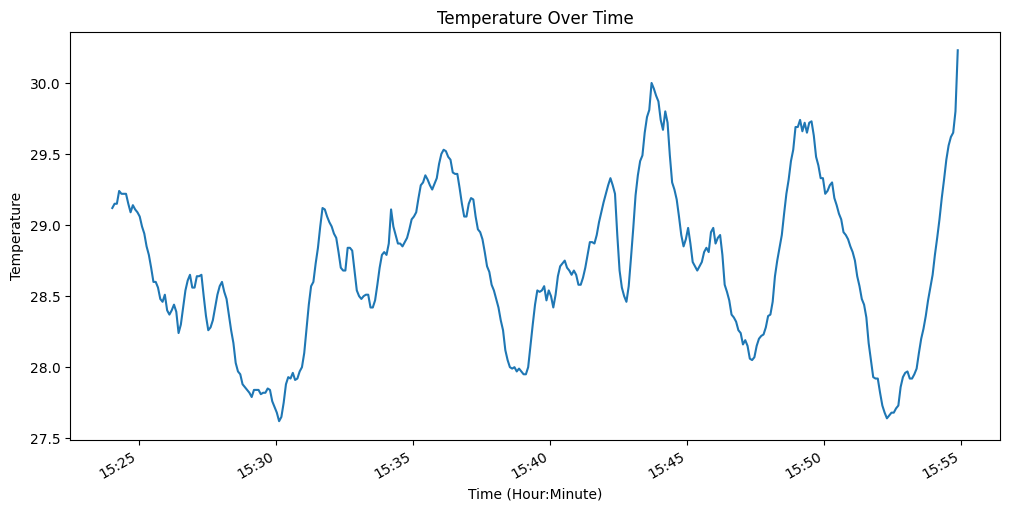

In [ ]:
# Ensure the Timestamp column is in datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

plt.figure(figsize=(12, 6))

# Plotting the data using the 'Timestamp' column for the x-axis
plt.plot(data['Timestamp'], data['Temperature'])

# Formatting the x-axis to show hour and minute
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting the labels and title
plt.xlabel('Time (Hour:Minute)')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

# Rotating the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()


In [ ]:
# Center of the map (average of latitude and longitude)
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]

# Create a map
mymap = folium.Map(location=map_center, zoom_start=15)

# Add points to the map
for idx, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Temp: {row['Temperature']}, Humidity: {row['Humidity']}, Air Quality: {row['Air Quality']}").add_to(mymap)

mymap.save("./../maps/map3.html")


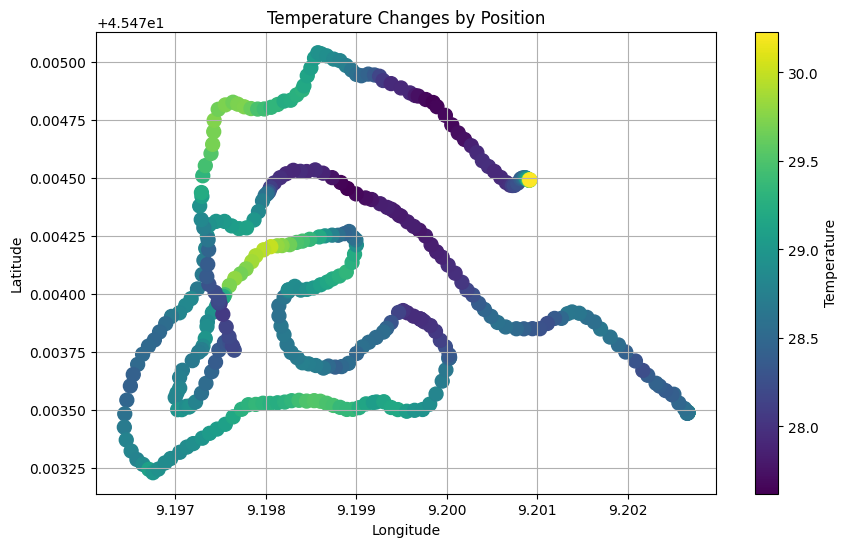

In [ ]:
df = data.copy()
# Plot temperature vs coordinates
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Temperature'], cmap='viridis', s=100)
plt.colorbar(sc, label='Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature Changes by Position')
plt.grid(True)
plt.show()

In [ ]:
# Create a color map
colormap = cm.linear.YlOrRd_09.scale(df['Temperature'].min(), df['Temperature'].max())

# Create a map centered around the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Add temperature data as circle markers with color according to temperature
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,
        popup=f'Temperature: {row["Temperature"]} °C',
        color=colormap(row['Temperature']),
        fill=True,
        fill_color=colormap(row['Temperature']),
        fill_opacity=0.7
    ).add_to(m)

# Add colormap legend
colormap.caption = 'Temperature'
colormap.add_to(m)

# Save the map to an HTML file
m.save('./../temperature-maps/temp-map3.html')

In [ ]:
# Convert Timestamp to datetime if it's not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the DataFrame by Timestamp to ensure arrows follow the correct order
df = df.sort_values(by='Timestamp')

# Create a map centered around the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=15)

# Add timestamp data as circle markers
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f'Timestamp: {row["Timestamp"]}',
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(m)

# Add arrows to indicate the passage of time
coords = list(zip(df['Latitude'], df['Longitude']))
ant_path = AntPath(locations=coords, color='blue', weight=2.5, opacity=0.7, delay=1000, dash_array=[10, 20], reverse=False)
ant_path.add_to(m)

# Save the map to an HTML file
m.save('./../path-maps/path-map3.html')
